In [1]:
# 卸売業者の分類
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# 卸売業者の
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import plotly.express as px

In [3]:
# dataset
DATA_DIR = './data/'
DATA = 'Wholesales_customers_data.csv'

In [4]:
# csv読み込み
df = pd.read_csv(os.path.join(DATA_DIR + DATA))

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

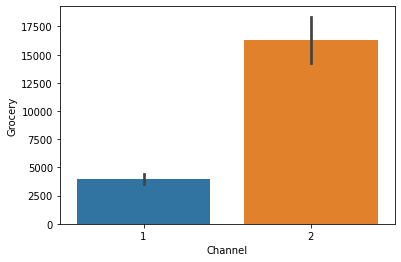

In [7]:
# plot
# df['Grocery'].var()
sns.barplot(data=df, x='Channel', y='Grocery')

In [8]:
df_consumer = df.query('Channel == 1')

In [9]:
df_restaurant = df.query('Channel == 2')

In [13]:
X = df.drop(columns=['Channel']) #　特徴量
y = df['Channel'] # 目的変数

In [14]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
# ランダムフォレスト
clf = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
clf.fit(X_train, y_train) # 訓練用データで学習

RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)

In [16]:
# 予測
# y_test
# y_pred = clf.predict(X_test ,y_test) #テスト用データの予測
y_pred = clf.predict(X_test)

In [17]:
# 精度評価
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9090909090909091


In [18]:
# ランダムフォレスト
clf = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=0)
clf.fit(X_train, y_train) # 訓練用データで学習

RandomForestClassifier(max_depth=30, n_estimators=30, random_state=0)

In [19]:
y_pred_02 = clf.predict(X_test)

In [20]:
# 精度評価
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_02)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.8939393939393939


In [21]:
y_pred.shape, y_test.shape

((132,), (132,))

In [22]:
y_pred_02.shape, y.shape, X_test.shape, X_train.shape, y_train.shape, y_test.shape

((132,), (440,), (132, 7), (308, 7), (308,), (132,))

In [23]:
clf.feature_importances_

array([0.01403931, 0.05412925, 0.12933116, 0.37997599, 0.06256326,
       0.299197  , 0.06076402])

In [24]:
X_train

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
77,3,12205,12697,28540,869,12034,1009
255,1,31614,489,1495,3242,111,615
277,3,9061,829,683,16919,621,139
146,3,7769,1936,2177,926,73,520
215,1,2806,10765,15538,1374,5828,2388
...,...,...,...,...,...,...,...
16,3,1020,8816,12121,134,4508,1080
66,3,9,1534,7417,175,3468,27
32,3,21632,1318,2886,266,918,405
279,3,17360,6200,9694,1293,3620,1721


In [28]:
# feature_names = [f'feature {i}' for i in range(X.shape[1])]
importances = clf.feature_importances_
# forest_importances = pd.Series(importances, index=feature_names)

In [36]:
# 提出用ファイル作成
# submit = y_pred

In [37]:
# df_submit = pd.DataFrame(submit)

In [38]:
# df_submit

,0
0,1
1,1
2,1
3,2
4,1
...,...
127,1
128,1
129,1
130,2


In [91]:
# csv書き込み
# df_submit.to_csv('test_submit.csv', header=None)